In [6]:
# import my package
import sys
sys.path.insert(1, '../')
from helper import plots, calc

# import other packages
import pandas as pd
import numpy as np
import json 
import seaborn as sns
from pylab import mpl, plt

In [4]:
df = pd.read_json('./price-btc-24h.json')

df.columns = ["time", "price"]
df["time"] = pd.to_datetime(df["time"])
df.set_index("time", inplace=True)


# Mayer multpliyer
df['SMA_200'] = df['price'].rolling(200).mean()
df["Mayer"] = (df["price"])/df["SMA_200"]
df = calc.to_percentile(df, "Mayer")
#df["Mayer"].plot.line( figsize=(18,8))

<AxesSubplot:xlabel='Mayer', ylabel='Count'>

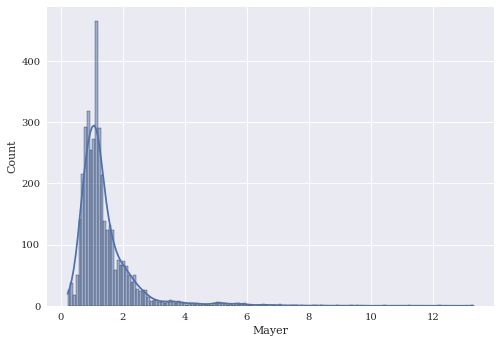

In [5]:
sns.histplot(df["Mayer"],kde=True )

/home/matias/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


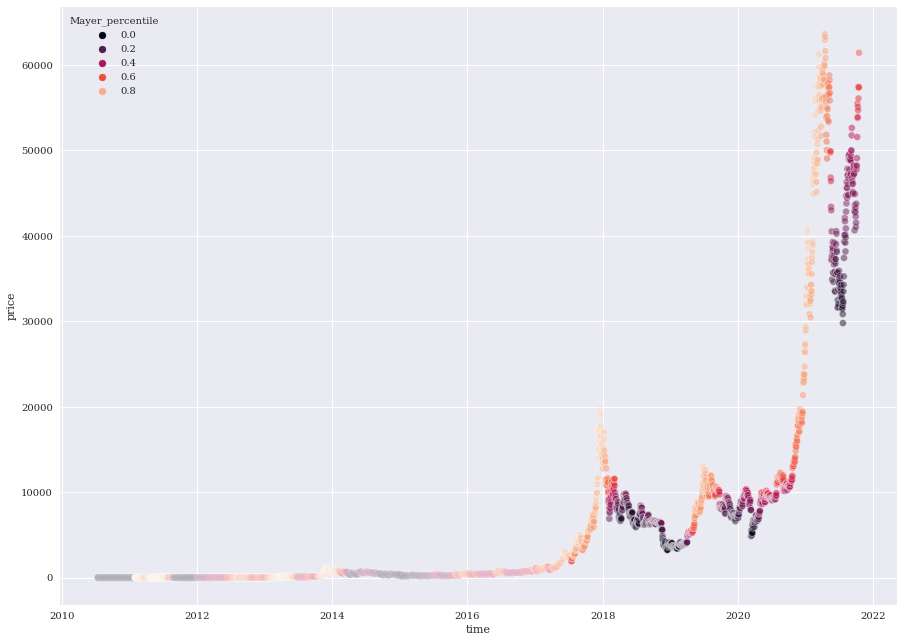

In [12]:
plots.plot_mayer(df);

## Training
----

In [ ]:
def generate_lags(mydata, col_name, lags=4):
    mydata = mydata.copy()
    lags=15
    cols = []
    for lag in range(1, lags + 1):
        col = f'{col_name}_lag_{lag}'
        mydata[col] = mydata[col_name].shift(lag)
        cols.append(col)
    return mydata
    


In [ ]:
# Mayor a 2014
data = df[df.time>"2014-01-01"]
data.loc[:, 'return'] = np.log(data['price'] /data['price'].shift(1)) 
data = generate_lags(data, "price", lags=15)
data = generate_lags(data, "Mayer_percentile", lags=15)


# partición train y test
fecha_part = "2020-01-01"
train = data[data.time<fecha_part]
train = to_percentile(train, "Mayer")
test = data[data.time>=fecha_part]

#plot_mayer(train)
cols2predict = list(train.columns[6:])
train_clean  = train.dropna()

In [ ]:
from sklearn.linear_model import  LogisticRegression

lm = LogisticRegression(C=1e7, solver='lbfgs',multi_class='auto',max_iter=1000)
lm.fit(train_clean[cols2predict], np.sign(train_clean['return'])) 

In [ ]:
test['prediction'] = lm.predict(test[cols2predict]) 

hits = np.sign(test['return'] *test['prediction']).value_counts()

In [ ]:
hits